In [1]:
from manim import*
from manim_slides import Slide
import numpy as np
import scipy as sp
import sympy as sy
import scipy.integrate as sc

config.verbosity = "WARNING"
config.media_width = "60%"

config.background_color = WHITE

Manim Community v0.18.0

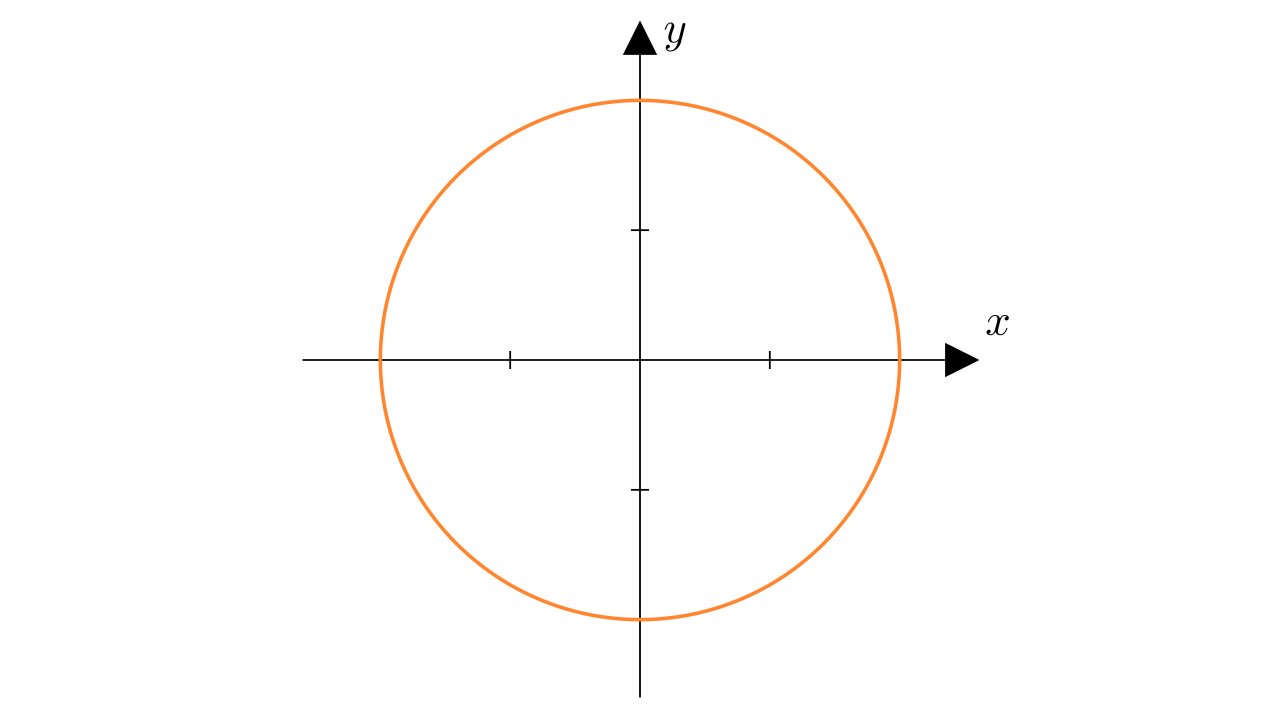

In [2]:
%%manim -qm graficadora

class graficadora(Scene):
    
    #función a graficar
    def func(self, u):
        return np.array([np.cos(u), np.sin(u), 0])

    def construct(self):

        #parámetros
        l = config.frame_height-0.5 #longitud ejes
        r = 1.3 #rango de los ejes
        e = 0.5 #espaciado entre las marcas de los ejes
        #ejes
        axes = Axes(
            x_range = [-r,r,e], x_length = l,
            y_range = [-r,r,e], y_length = l,
            )#.add_coordinates() #por si queremos agregar los números
        axes.set_color(BLACK) #cambiar el color de ejes
        #etiquetas
        labels = axes.get_axis_labels(
            MathTex(r'x'), MathTex(r'y')
        ).set_color(BLACK) #cambiar color de etiquetas
        #función
        funcion = ParametricFunction(
            lambda u: axes.c2p(*self.func(u)),
            t_range=[0, 2*PI], #rango de la función
            color = ORANGE #color
        )
        #añadimos los objetos a la escena en orden
        self.add(axes, labels, funcion)

In [3]:
%%manim -qm cicloide

class cicloide(Scene):

    #función circunferencia
    def func1(self, u, theta):
        return np.array([
                    np.cos(u) + theta,
                    np.sin(u) + 1,
                    0
            ])

    #función cicloide
    def func2(self, u, theta):
        return np.array([
                    theta - np.sin(theta),
                    1 - np.cos(theta),
                    0
            ])

    def construct(self):

        #parámetros
        l = config.frame_height-0.5 #longitud ejes
        r = 7.5 #rango de los ejes
        e = 2 #espaciado entre las marcas de los ejes

        #ejes
        axes = Axes(
            x_range = [0,r,e], x_length = l/2,
            y_range = [0, r/2,e], y_length = l/4,
            )#.add_coordinates()
        axes.set_color(BLACK)
        
        s = ValueTracker(0) #tiempo t en 0

        #circunferencia que se mueve
        c = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())),
            t_range=[0, 2*PI],
            color = ORANGE
        ))

        #cicloide, no lo dibujamos como tal, este es el camino que seguirá la pelota
        A = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func2(u, s.get_value())),
            t_range=[0, 2*PI],
            color = ORANGE
        ))

        #punto que dibuja
        ball = Dot(radius=0.05, color = BLACK)
        ball.add_updater(lambda x: x.move_to(A))

        #definimos la traza 
        path = VMobject()
        path.set_points_as_corners([ball.get_center(), ball.get_center()])

        def update_path(path):
            previous_path = path.copy()
            previous_path.add_points_as_corners([ball.get_center()])
            path.become(previous_path)
        path.add_updater(update_path)
        path.set_color(BLACK)

        #agrupamos
        movil = VGroup(ball,path)
        movil.move_to(A.get_start())

        #radio 
        line = Line(c.get_center(),ball.get_center(), color= BLACK)
        line.add_updater(lambda x: x.become(Line(c.get_center(),ball.get_center(), color= BLACK)))

        #añadimos los objetos a la escena en orden

        todo = VGroup(axes, c, A, movil, line, path)
        todo.scale(1.5)

        self.add(todo)
        
        self.play(s.animate.set_value(2*PI), rate_func=linear, run_time=5)


class deltoide(Scene):

    #función circunferencia de radio 2
    def func1(self, u, theta):
        return np.array([
                    2 * np.cos(theta) + np.cos(u),
                    2 * np.sin(theta) + np.sin(u),
                    0
            ])

    #función 
    def func2(self, u, theta):
        return np.array([
                    2 * np.cos(theta) + np.cos(-2*theta),
                    2 * np.sin(theta) + np.sin(-2*theta),
                    0
            ])

    def construct(self):

        #parámetros
        l = config.frame_height-0.5 #longitud ejes
        r = 3.5 #rango de los ejes
        e = 2 #espaciado entre las marcas de los ejes

        #ejes
        axes = Axes(
            x_range = [-r,r,e], x_length = l,
            y_range = [-r,r,e], y_length = l,
            )#.add_coordinates()
        axes.set_color(BLACK)
        
        s = ValueTracker(0) #tiempo t en 0
        
        #circunferencia de radio 3 centrada en el origen
        C = axes.plot_implicit_curve(lambda x, y: x**2 + y**2 - 9, color=GREEN)

        #circunferencia que se mueve
        c = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())),
            t_range=[0, 2*PI],
            color = RED
        ))

        #Astroide, no lo dibujamos como tal, este es el camino que seguirá la pelota
        A = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func2(u, s.get_value())),
            t_range=[0, 2*PI],
            color = RED
        ))

        #punto que dibuja
        ball = Dot(radius=0.05, color = BLACK)
        ball.add_updater(lambda x: x.move_to(A))

        #definimos la traza 
        path = VMobject()
        path.set_points_as_corners([ball.get_center(), ball.get_center()])

        def update_path(path):
            previous_path = path.copy()
            previous_path.add_points_as_corners([ball.get_center()])
            path.become(previous_path)
        path.add_updater(update_path)
        path.set_color(BLACK)

        #agrupamos
        movil = VGroup(ball,path)
        movil.move_to(A.get_start())

        #radio 
        line = Line(c.get_center(),ball.get_center(), color= BLACK)
        line.add_updater(lambda x: x.become(Line(c.get_center(),ball.get_center(), color= BLACK)))

        #añadimos los objetos a la escena en orden
        self.add(axes, C, c, A, ball, line, path)
        self.play(s.animate.set_value(2*PI), rate_func=linear, run_time=5)


class astroide(Scene):

    #función circunferencia de radio 3
    def func1(self, u, theta):
        return np.array([
                    3 * np.cos(theta) + np.cos(u),
                    3 * np.sin(theta) + np.sin(u),
                    0
            ])

    #función astroide
    def func2(self, u, theta):
        return np.array([
                    3 * np.cos(theta) + np.cos(-3*theta),
                    3 * np.sin(theta) + np.sin(-3*theta),
                    0
            ])

    def construct(self):

        #parámetros
        l = config.frame_height-0.5 #longitud ejes
        r = 4.5 #rango de los ejes
        e = 2 #espaciado entre las marcas de los ejes

        #ejes
        axes = Axes(
            x_range = [-r,r,e], x_length = l,
            y_range = [-r,r,e], y_length = l,
            )#.add_coordinates()
        axes.set_color(BLACK)
        
        s = ValueTracker(0) #tiempo t en 0
        
        #circunferencia de radio 4 centrada en el origen
        C = axes.plot_implicit_curve(lambda x, y: x**2 + y**2 - 16, color=BLUE)

        #circunferencia que se mueve de radio 3
        c = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())),
            t_range=[0, 2*PI],
            color = ORANGE
        ))

        #Astroide, no lo dibujamos como tal, este es el camino que seguirá la pelota
        A = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func2(u, s.get_value())),
            t_range=[0, 2*PI],
            color = ORANGE
        ))

        #punto que dibuja
        ball = Dot(radius=0.05, color = BLACK)
        ball.add_updater(lambda x: x.move_to(A))

        #definimos la traza 
        path = VMobject()
        path.set_points_as_corners([ball.get_center(), ball.get_center()])

        def update_path(path):
            previous_path = path.copy()
            previous_path.add_points_as_corners([ball.get_center()])
            path.become(previous_path)
        path.add_updater(update_path)
        path.set_color(BLACK)

        #agrupamos
        movil = VGroup(ball,path)
        movil.move_to(A.get_start())

        #radio 
        line = Line(c.get_center(),ball.get_center(), color= BLACK)
        line.add_updater(lambda x: x.become(Line(c.get_center(),ball.get_center(), color= BLACK)))

        #añadimos los objetos a la escena en orden
        self.add(axes, C, c, A, ball, line, path)
        self.play(s.animate.set_value(2*PI), rate_func=linear, run_time=5)



In [4]:
%%manim -qm longituddearco

class longituddearco(Scene):

    def func(self, t):
        a = 0.3 / 2
        b = 0.5 / 2
        c = 5
        d = 3
        #return (a * np.cos(t) * np.exp(b*t), a * np.sin(t) * np.exp(b*t) , 0)
        #return (np.cos(t)/(1+ (np.sin(t))**2), np.cos(t) * np.sin(t)/(1+ (np.sin(t))**2), 0)
        return (c* np.cos(t), d * np.sin(t), 0)

    def construct(self):

        t0 = 0
        s = ValueTracker(t0)

        # cálculo de la curvatura
        x = sy.Symbol('x')
        c = 5
        d = 3

        fx = c*sy.cos(x)
        fy = d*sy.sin(x)

        fx1 = sy.diff(fx, x)
        fy1 = sy.diff(fy, x)

        fx2 = sy.diff(fx1, x)
        fy2 = sy.diff(fy1, x)

        num = sy.Abs(fx1*fy2 - fy1*fx2)
        den = (fx1**2 + fy1**2)**sy.Rational(3,2)
        k_sym = sy.simplify(num / den)

        curvature = sy.lambdify(x, k_sym, "numpy")

        # cálculo de longitud
        def long(t):
            if t <= 0:
                return 0
            n = 200
            u = np.linspace(0, t, n)
            speed = np.sqrt(25*np.sin(u)**2 + 9*np.cos(u)**2)
            return np.trapz(speed, u)


        # gráfica de la función (elipse)
        ax = Axes(
            x_range=[-5.1, 5.1, 1], x_length=config.frame_height-1,
            y_range=[-5.1, 5.1, 1], y_length=config.frame_height-1,
            axis_config={"numbers_to_include": np.arange(-5.1, 5.1, 1), "font_size": 20},
            tips=False
        ).set_color(BLACK)

        curva = ax.plot_parametric_curve(self.func, t_range=[0, 2*np.pi], color='#DB2E2C')
        caja = SurroundingRectangle(ax, color=BLACK, buff=0.2)
        grafica = VGroup(ax, curva, caja).move_to(np.array([-3.25,0,0]))
        self.add(grafica)

        textocurva = MathTex(r'f(t) = \left(5\cos t, 3\sin t \right)', color=BLACK, font_size=40)
        textocurva.move_to(np.array([4.5,3.85,0]))
        self.add(textocurva)

        # recorrido de la bola
        ball = Dot(radius=0.05, color=BLUE_E)
        ball.add_updater(lambda y: y.move_to(ax.c2p(*self.func(s.get_value())[:2])))

        path = VMobject().set_color(BLUE_E)
        path.set_points_as_corners([ball.get_center(), ball.get_center()])
        path.add_updater(lambda p: p.add_points_as_corners([ball.get_center()]))

        m1 = VGroup(ball, path)
        m1.move_to(ax.c2p(*self.func(s.get_value())[:2]))

        self.add(m1)

        # gráfica curvatura
        ax2 = Axes(
            x_range=[-0.1, 6.6, 1], x_length=(config.frame_width-1)/2.75,
            x_axis_config={"numbers_to_include": np.arange(-0.1, 6.6, 1), "font_size": 20,},
            y_range=[-0.1, 1.1, 0.5], y_length=(config.frame_height-1)/2.75,
            y_axis_config={"numbers_to_include": np.arange(-0, 1.1, 0.5), "font_size": 20,},
            tips=False,
        ).set_color(BLACK)
        caja2 = SurroundingRectangle(ax2, color=BLACK, buff=0.2)
        grafica2 = VGroup(ax2, caja2).move_to(np.array([4.5,-2.375,0]))
        self.add(grafica2)

        ball2 = Dot(radius=0.05, color=BLUE_E)
        ball2.add_updater(lambda y: y.move_to(ax2.c2p(s.get_value(), curvature(s.get_value()))))

        path2 = VMobject().set_color(BLUE_E)
        path2.set_points_as_corners([ball2.get_center(), ball2.get_center()])
        path2.add_updater(lambda p: p.add_points_as_corners([ball2.get_center()]))

        m2 = VGroup(ball2, path2)
        m2.move_to(ax2.c2p(s.get_value(), curvature(s.get_value())))

        self.add(m2)

        # Gráfica longitud
        ax3 = Axes(
            x_range=[-0.1, 6.6, 1], x_length=(config.frame_width-1)/2.75,
            y_range=[-0.1, 25.6, 5], y_length=(config.frame_height-1)/2.75,
            x_axis_config={"numbers_to_include": np.arange(-0.1, 6.6, 1), "font_size": 20,},
            y_axis_config={"numbers_to_include": np.arange(-0.1, 25.6, 5), "font_size": 20,},
            tips=False,
        ).set_color(BLACK)
        caja3 = SurroundingRectangle(ax3, color=BLACK, buff=0.2)
        grafica3 = VGroup(ax3, caja3).move_to(np.array([4.5,1.35,0]))
        self.add(grafica3)

        ball3 = Dot(radius=0.05, color=BLUE_E)
        ball3.add_updater(lambda y: y.move_to(ax3.c2p(s.get_value(), long(s.get_value()))))

        path3 = VMobject().set_color(BLUE_E)
        path3.set_points_as_corners([ball3.get_center(), ball3.get_center()])
        path3.add_updater(lambda p: p.add_points_as_corners([ball3.get_center()]))

        m3 = VGroup(ball3, path3)
        m3.move_to(ax3.c2p(s.get_value(), long(s.get_value())))

        self.add(m3)

        #contador
        lon = DecimalNumber(0, num_decimal_places=2).set_color(BLACK)
        lon.add_updater(lambda d: d.set_value(long(s.get_value())))
        lon.add_updater(lambda d: d.next_to(ball3, 1.2 * UR))
        self.add(lon)

        #texto
        self.add(MathTex(r'\ell', font_size=40, color=BLACK).next_to(caja3.get_right(), 1.5*LEFT+5*UP))
        self.add(MathTex(r'\kappa', font_size=40, color=BLACK).next_to(caja2.get_right(), 1.5*LEFT+5*UP))

        # animación
        self.play(s.animate.set_value(TAU), run_time=6, rate_func=linear)
        self.wait()

In [ ]:
%%manim -qm osculadora2d

import sympy as sy
import numpy as np
from manim import *

class osculadora2d(Scene):
    
    #función otra vez
    def func(self, u, t):
        return np.array([
            u,
            np.sin(u),
            0
            ])

    def construct(self):

        #parámetros
        l = config.frame_height-0.5 #longitud ejes
        r = 8 #rango de los ejes
        e = 2 #espaciado entre las marcas de los ejes

        self.x_sym = sy.symbols('x')
        fan_sym = (self.x_sym, sy.sin(self.x_sym), 0) #función
        
        # Cálculo de derivadas simbólicas
        d1_sym = [sy.diff(fan_sym[i], self.x_sym) for i in range(0,3)] #derivada primera
        d2_sym = [sy.diff(fan_sym[i], self.x_sym, 2) for i in range(0,3)] #derivada segunda

        self.func_x = sy.lambdify(self.x_sym, fan_sym[0], 'numpy')
        self.func_y = sy.lambdify(self.x_sym, fan_sym[1], 'numpy')
        
        self.d1_0 = sy.lambdify(self.x_sym, d1_sym[0], 'numpy')
        self.d1_1 = sy.lambdify(self.x_sym, d1_sym[1], 'numpy')
        
        self.d2_0 = sy.lambdify(self.x_sym, d2_sym[0], 'numpy')
        self.d2_1 = sy.lambdify(self.x_sym, d2_sym[1], 'numpy')
        
        #ejes
        axes = Axes(
            x_range = [-r,r,e], x_length = l,
            y_range = [-r,r,e], y_length = l,
            )#.add_coordinates()
        axes.set_color(BLACK)
        self.add(axes)
        
        s = ValueTracker(-2*PI) #tiempo t en 0
        
        #función verde
        C = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func(u, s.get_value())),
            t_range=[-2*PI, 2*PI],
            color = GREEN
        ))

        #circunferencia osculadora
        c = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())),
            t_range=[-2*PI, 2*PI],
            color = PURPLE
        ))

        #punto que dibuja
        ball = Dot(radius=0.05, color = BLACK)
        ball.add_updater(lambda x: x.move_to(axes.c2p(*self.func(s.get_value(), 0))))

        #radio 
        line = Line(c.get_center(),ball.get_center(), color= BLACK)
        line.add_updater(lambda x: x.become(Line(c.get_center(),ball.get_center(), color= BLACK)))

        self.add(C, c, ball, line)     
        self.play(s.animate.set_value(2*PI), rate_func=linear, run_time=10)


    def func1(self, u, t):
        
        d1_0 = self.d1_0(t)
        d1_1 = self.d1_1(t)
        d2_0 = self.d2_0(t)
        d2_1 = self.d2_1(t)

        # Cálculo de la curvatura (k) y radio (R)
        num = (d1_0 * d2_1 - d1_1 * d2_0)
        den = (d1_0**2 + d1_1**2)**(3/2)
        
        # Curvatura
        k = num / den if den != 0 else 0

        if abs(k) < 1e-9:
            k = np.inf
        
        # Radio de curvatura (R = 1/k)
        R = 1/k if k != 0 else np.inf
        
        # Valores de la función en el punto t
        x_at_t = self.func_x(t)
        y_at_t = self.func_y(t)

        if k == np.inf or R == np.inf:
            xc, yc = x_at_t, y_at_t
            return np.array([x_at_t, y_at_t, 0])
        else:
            
            r_val_sq = (d1_0**2 + d1_1**2)
            xc = x_at_t - d1_1 * r_val_sq / num
            yc = y_at_t + d1_0 * r_val_sq / num

            return np.array([
                R*np.cos(u) + xc,
                R*np.sin(u) + yc,
                0
                ])

In [ ]:
%%manim -qm evolvente

x_sym = sy.symbols('x')

#función
fan_sym = sy.Matrix([
    (sy.cos(x_sym))**3,
    (sy.sin(x_sym))**3,
    0
])

d1_sym = sy.diff(fan_sym, x_sym, 1) # Derivada primera simbólica
d2_sym = sy.diff(fan_sym, x_sym, 2) # Derivada segunda simbólica


fan_func = sy.lambdify(x_sym, fan_sym, "numpy")
d1_func = sy.lambdify(x_sym, d1_sym, "numpy")
d2_func = sy.lambdify(x_sym, d2_sym, "numpy")

class evolvente(Scene):
    
    # Función para la curva
    def func(self, u, t):
        return np.array([
            (np.cos(u))**3,
            (np.sin(u))**3,
            0
            ])

    # Función para la circunferencia osculadora y el centro de curvatura
    def func1(self, u, t):
        ft = fan_func(t).flatten()
        d1 = d1_func(t).flatten()
        d2 = d2_func(t).flatten()

        num = np.float64(d1[0] * d2[1] - d1[1] * d2[0])
        mod_d1_sq = d1[0]**2 + d1[1]**2
        den = np.power(mod_d1_sq, 3/2)

        epsilon = 1e-6 
        k = np.float64(num / (den if den > epsilon else epsilon)) 

        r = np.float64(1.0 / k) 
        
        factor = mod_d1_sq / num
        
        xc = np.float64(ft[0] - d1[1] * factor) 
        yc = np.float64(ft[1] + d1[0] * factor) 
        
        R_circulo = np.float64(abs(r))

        # Ecuación de la circunferencia osculadora
        circle_x = R_circulo * np.cos(u) + xc
        circle_y = R_circulo * np.sin(u) + yc
        
        return np.array([circle_x, circle_y, xc, yc])
    
    def construct(self):

        # Parámetros
        l = config.frame_height-0.5
        r = 4
        e = 2

        # Ejes
        axes = Axes(
            x_range = [-r,r,e], x_length = l,
            y_range = [-r,r,e], y_length = l,
            )
        axes.set_color(BLACK)
        self.add(axes)
        
        s = ValueTracker(0.001)

        # Curva
        C = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func(u, s.get_value())[0:2]),
            t_range=[0, 2*PI],
            color = GREEN
        ))

        # Circunferencia osculadora
        c = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())[0:2]),
            t_range=[0, 2*PI],
            color = PURPLE
        ))
        
        # Evoluta
        ev_dot = always_redraw(
            lambda: Dot(
                axes.c2p(*self.func1(0, s.get_value())[2:4]),
                color = RED,
                radius = 0.05
            )
        )

        # Punto que dibuja
        ball = Dot(radius=0.05, color = BLACK)
        ball.add_updater(lambda x: x.move_to(axes.c2p(*self.func(s.get_value(), 0)[0:2])))

        # Punto del centro de curvatura
        bola = Dot(radius=0.05, color = BLACK)
        bola.add_updater(lambda x: x.move_to(axes.c2p(*self.func1(0, s.get_value())[2:4])))

        # Radio
        line = Line(bola.get_center(),ball.get_center(), color= BLACK)
        line.add_updater(lambda x: x.become(Line(bola.get_center(),ball.get_center(), color= BLACK)))

        # Definimos la traza (evolvente)
        path = VMobject()
        path.set_points_as_corners([bola.get_center(), bola.get_center()])

        def update_path(path_obj):
            previous_path = path_obj.copy()
            previous_path.add_points_as_corners([bola.get_center()])
            path_obj.become(previous_path)
        path.add_updater(update_path)
        path.set_color(ORANGE)

        # Agrupamos
        movil = VGroup(bola,path)
        movil.move_to(axes.c2p(*self.func1(0, s.get_value())[2:4]))
        
        self.add(C, c, ev_dot, ball, line, movil)
        self.play(s.animate.set_value(2 * PI), rate_func=linear, run_time=5)

In [5]:
%%manim -qm tfcp

import scipy.integrate as spi
from scipy.interpolate import interp1d

class tfcp(Scene):

    def construct(self):

        t_min = -4*np.pi
        t_max = 4*np.pi
        N = 10000  # más puntos -> curva suave
        T = np.linspace(t_min, t_max, N)

        #función curvatura
        def k(x):
            return x * np.cos(x) + np.sin(x)

        P = np.array([spi.quad(k, 0, t)[0] for t in T])

        dX = np.cos(P)
        dY = np.sin(P)

        X_raw = spi.cumulative_trapezoid(dX, T, initial=0)
        Y_raw = spi.cumulative_trapezoid(dY, T, initial=0)

        idx0 = np.argmin(np.abs(T - 0))

        X = X_raw - X_raw[idx0]
        Y = Y_raw - Y_raw[idx0]

        fx = interp1d(T, X, kind="cubic")
        fy = interp1d(T, Y, kind="cubic")

        s = ValueTracker(t_min)

        ax = Axes(
            x_range=[np.min(X)-0.25, np.max(X)+0.25, 1],
            y_range=[np.min(Y)-0.25, np.max(Y)+0.25, 1],
            x_length=6,
            y_length=6,
            tips=False,
            axis_config={"color": BLACK, "include_numbers": True},
        )

        caja = SurroundingRectangle(ax, color=BLACK, buff=0.2)
        grafica = VGroup(ax, caja)
        self.add(grafica)

        x0 = fx(t_min)
        y0 = fy(t_min)
        ball = Dot(radius=0.035, color=RED).move_to(ax.c2p(x0, y0))
        self.add(ball)

        path = VMobject(color=RED, stroke_width = 2.5)
        path.set_points_as_corners([ball.get_center(), ball.get_center()])
        self.add(path)

        def update_ball(m):
            t = s.get_value()
            m.move_to(ax.c2p(fx(t), fy(t)))
        ball.add_updater(update_ball)

        def update_path(m):
            new_point = ball.get_center()
            last = m.get_last_point()
            if np.linalg.norm(new_point - last) > 1e-4:
                m.add_points_as_corners([new_point])
        path.add_updater(update_path)

        todo = VGroup(ax, caja, ball, path)
        todo.move_to([0, 0, 0])
        todo.scale(1.25)
        self.add(todo)

        self.play(s.animate.set_value(t_max), run_time=14, rate_func=linear)
        self.wait()


In [ ]:
%%manim -qm triedroOsculadora

class triedroOsculadora(ThreeDScene):

    #función    
    def func(self, u):
        return np.array([
            0.2 * u * np.cos(u) ,
            0.2 * u * np.sin(u),
            0.2 * u
            ])

    #calculando la circunferencia osculadora
    def func1(self, u, t):
        x = sy.symbols('x')
        fan = (0.2 * x * sy.cos(x), 0.2 * x * sy.sin(x), 0.2 * x) #función
        d1_num = np.array([sy.diff(fan[i], x).evalf(subs={x:t}) for i in range(3)], dtype=float) #primera derivada
        d2_num = np.array([sy.diff(fan[i], x, 2).evalf(subs={x:t}) for i in range(3)], dtype=float) #segunda derivada

        r = np.array([fan[i].evalf(subs={x: t}) for i in range(3)], dtype=float)

        norm_d1 = np.linalg.norm(d1_num)
        U = d1_num / norm_d1
        cross_d1_d2 = np.cross(d1_num, d2_num)
        norm_cross = np.linalg.norm(cross_d1_d2)
        if norm_cross == 0:
            v = np.array([0., 0., 0.])
            k = 0.0
        else:
            v = cross_d1_d2 / norm_cross
            k = norm_cross / (norm_d1 ** 3)
             
        w = np.cross(v, U)

        
        if k == 0:
            R = np.inf
            C = np.array([np.inf, np.inf, np.inf])
        else:
            R = np.float64(1.0 / k) 
            C = r + R * w
            
        xc = np.float64(C[0] + R * (np.cos(u) * U[0] + np.sin(u) *w[0]))
        yc = np.float64(C[1] + R * (np.cos(u) * U[1] + np.sin(u) *w[1]))
        zc = np.float64(C[2] + R * (np.cos(u) * U[2] + np.sin(u) *w[2]))
        
        
        return [r, U, v, w, xc, yc, zc]

    def construct(self):
        L = 5.5
        axes = ThreeDAxes(
            x_range=[-L,L,1], x_length=config.frame_height-0.5,
            y_range=[-L,L,1], y_length=config.frame_height-0.5,
            z_range=[-L,L,1], z_length=config.frame_height-0.5
            ).set_color(BLACK)
        self.add(axes)

        sup = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func(u)),
            t_range=[0.0001, 4*PI],
            color = ORANGE
        ))
        self.add(sup)

        s = ValueTracker(0.0001)
        punto = always_redraw(
            lambda: Dot3D(
                axes.c2p(*(self.func(s.get_value()))),
                color = RED,
                radius = 0.04
            )
        )
        self.add(punto)

        tangente = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.func1(0, s.get_value())[1]),
                color = BLUE
            ))
        
        binormal = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.func1(0, s.get_value())[2]),
                color = GREEN
            ))
        
        normal = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.func1(0, s.get_value())[3]),
                color = RED
            ))
        triedro = VGroup(tangente, normal, binormal)
        self.add(triedro)

        osculadora = always_redraw(
            lambda: ParametricFunction(
            lambda u: axes.c2p(*self.func1(u, s.get_value())[4:7]),
            t_range=[0.0001, 2*PI],
            color = PURPLE
        ))
        self.add(osculadora)


        self.renderer.camera.light_source.move_to(3*IN) 
        self.set_camera_orientation(theta=70 * DEGREES, phi=75 * DEGREES)
        self.begin_ambient_camera_rotation(rate = 30*DEGREES, about = "theta")
        self.play(s.animate.set_value(4*PI),  run_time= 4, rate_func=linear)
        self.wait()



Animation 0: _MethodAnimation(ValueTracker):   0%|          | 0/120 [00:00<?, ?it/s]

Archivo 'curva_frenet_serret.csv' guardado.


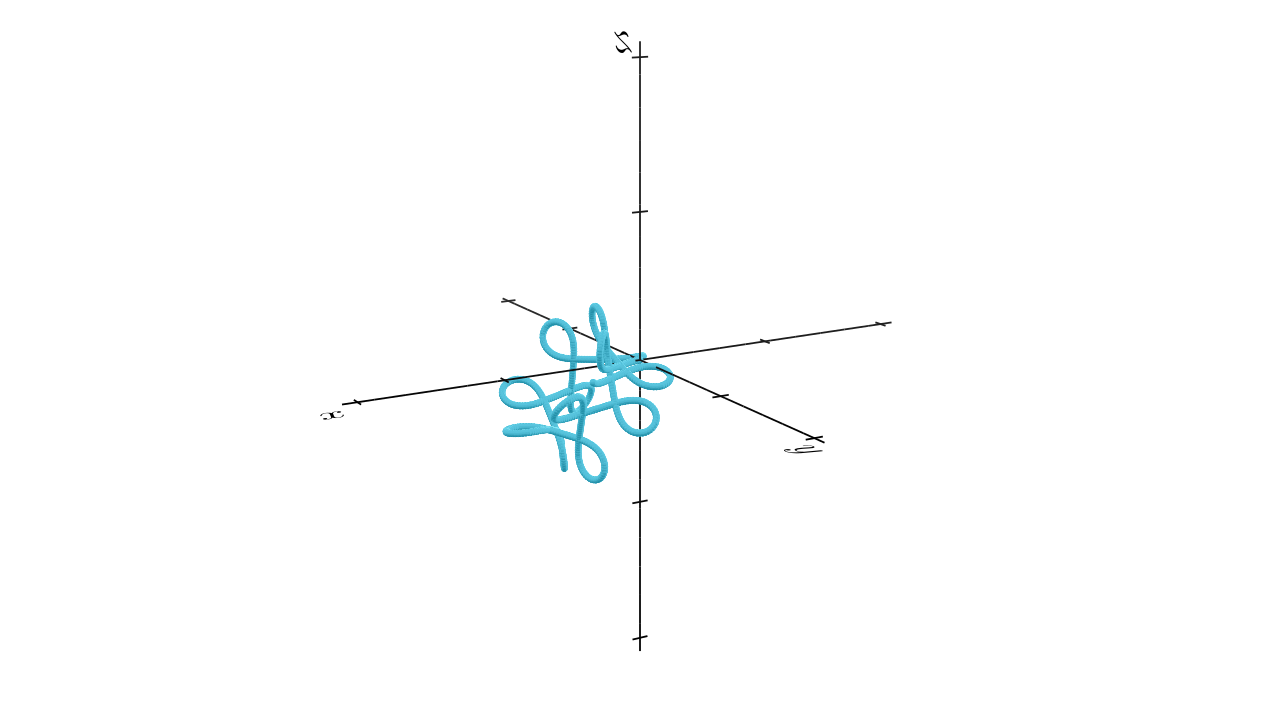

In [7]:
%%manim -qm tfce

from scipy.integrate import solve_ivp
import pandas as pd

def frenet_serret(s, y):
    T = y[0:3]
    N = y[3:6]
    B = y[6:9]
    r = y[9:12]

    k = 10 * (np.sin(np.pi * s))**2 #curvatura
    t = 3 * np.cos(np.pi * s) #torsión

    #sistema de ecuaciones
    dTds = k * N
    dNds = -k * T + t * B
    dBds = -t * N
    drds = T

    return np.concatenate([dTds, dNds, dBds, drds])

# Condiciones iniciales
T0 = np.array([1, 0, 0])
N0 = np.array([0, 1, 0])
B0 = np.array([0, 0, 1])
r0 = np.array([0, 0, 0])
y0 = np.concatenate([T0, N0, B0, r0])

# Intervalo de integración
s_span = (-2 * np.pi, 2 * np.pi)
s_eval = np.linspace(*s_span, 700)

# Resolver el sistema
sol = solve_ivp(frenet_serret, s_span, y0, t_eval=s_eval, method='RK45')

# Extraer la curva
r = sol.y[9:12].T  # Transpuesta para tener las filas como puntos

# Guardar en CSV
df = pd.DataFrame(r, columns=["x", "y", "z"])
df.to_csv("curva_frenet_serret.csv", index=False)

print("Archivo 'curva_frenet_serret.csv' guardado.")

class tfce(ThreeDScene):

    def construct(self):
        self.set_camera_orientation(theta=60 * DEGREES, phi= 75 * DEGREES, zoom = 1)
        L = 2.1
        ax = ThreeDAxes(
            x_range=[-1 * L, L, 1], x_length=config.frame_height-1,
            y_range=[-1 * L, L, 1], y_length=config.frame_height-1,
            z_range=[-1 * L, L, 1], z_length=config.frame_height-1,
            tips=False,
        ).set_color(BLACK)
        xya = ax.get_axis_labels().set_color(BLACK)
        self.add(ax,xya)

        df = pd.read_csv("curva_frenet_serret.csv")
        dots = [Dot3D(ax.c2p(x, y, z), color= BLUE,radius=0.035) for x, y, z in df.values]
        for dot in dots:
            self.add(dot)

In [2]:
%%manim -qm triedroF

class triedroF(ThreeDScene):

    def setup(self):

        u = sy.symbols("u", real=True)

        #función
        x = (sy.cos(5*u) + 1.5) * sy.cos(2*u)
        y = (sy.cos(5*u) + 1.5) * sy.sin(2*u)
        z = - sy.sin(5*u)

        self.r_sym = sy.Matrix([x, y, z]) #función convertida a sympy

        self.r1_sym = self.r_sym.diff(u) #primera derivada
        self.r2_sym = self.r1_sym.diff(u) #segunda derivada
        
        #conversión a numpy para agilizar el cálculo
        self.r = sy.lambdify(u, self.r_sym, "numpy")
        self.r1 = sy.lambdify(u, self.r1_sym, "numpy")
        self.r2 = sy.lambdify(u, self.r2_sym, "numpy")

    def frenet(self, u):
        #relaciones dentro del triedro
        r = np.array(self.r(u), dtype=float).reshape(3)
        r1 = np.array(self.r1(u), dtype=float).reshape(3)
        r2 = np.array(self.r2(u), dtype=float).reshape(3)

        T = r1 / np.linalg.norm(r1)

        Bn = np.cross(r1, r2)
        nb = np.linalg.norm(Bn)
        if nb < 1e-10:
            B = np.zeros(3)
        else:
            B = Bn / nb

        N = np.cross(B, T)

        return r, T, N, B

    def construct(self):
        L = 3
        axes = ThreeDAxes(
            x_range=[-L, L, 1], x_length=config.frame_height - 0.5,
            y_range=[-L, L, 1], y_length=config.frame_height - 0.5,
            z_range=[-L, L, 1], z_length=config.frame_height - 0.5
        ).set_color(BLACK)

        self.add(axes)

        curva = always_redraw(
            lambda: ParametricFunction(
                lambda u: axes.c2p(*np.array(self.r(u), dtype=float).reshape(3)),
                t_range=[0, 2*PI],
                color=ORANGE
            )
        )
        self.add(curva)

        s = ValueTracker(0)

        punto = always_redraw(
            lambda: Dot3D(
                axes.c2p(*self.r(s.get_value()).reshape(3)),
                color=RED,
                radius=0.08
            )
        )
        self.add(punto)

        tangente = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.frenet(s.get_value())[1]),
                color=BLUE
            )
        )

        normal = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.frenet(s.get_value())[2]),
                color=RED
            )
        )

        binormal = always_redraw(
            lambda: Arrow3D(
                punto.get_center(),
                punto.get_center() + axes.c2p(*self.frenet(s.get_value())[3]),
                color=GREEN
            )
        )

        self.add(VGroup(tangente, normal, binormal))

        self.renderer.camera.light_source.move_to(3 * IN)
        self.set_camera_orientation(theta=70*DEGREES, phi=75*DEGREES)
        self.begin_ambient_camera_rotation(rate=30*DEGREES, about="theta")

        self.play(
            s.animate.set_value(2*PI),
            run_time=3,
            rate_func=linear
        )
